## Import necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

## General definitions

In [18]:
zero = [1,0]
one = [0,1]

X = [[0,1],[1,0]]
H = [[1,1],[1,-1]]/np.sqrt(2)
CNOT = [[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]

n_qubits_max = 14

## Function to calculate code runtime

In [4]:
def runtime(n_qubits_max,q_ckt):

    time = np.zeros(n_qubits_max+1)
    
    for i in range(2,n_qubits_max+1):
        start = timeit.default_timer()
        q_ckt(i)
        stop = timeit.default_timer()
        time[i] = stop-start

    return time

## Implementation of part 1

In [5]:
def q_ckt1(n_qubits):
    
    init_state = zero #Start with all zeros
    X_n = X
    H_n = H
    CNOT_n = CNOT
    
    for i in range(n_qubits-1):
        init_state = np.kron(init_state,zero)
        X_n = np.kron(X_n,X)
        H_n = np.kron(H_n,H)

    for i in range(int(n_qubits/2)-1):
        CNOT_n = np.kron(CNOT_n,CNOT)
    if n_qubits%2==1:
        CNOT_n = np.kron(CNOT_n,np.eye(2))

    final_state = np.matmul(CNOT_n,np.matmul(X_n,np.matmul(H_n,init_state)))

    return final_state    

In [19]:
runtime_lst1 = runtime(n_qubits_max,q_ckt1)

Text(0.5, 1.0, 'Code runtime for max. number of qubits = 14')

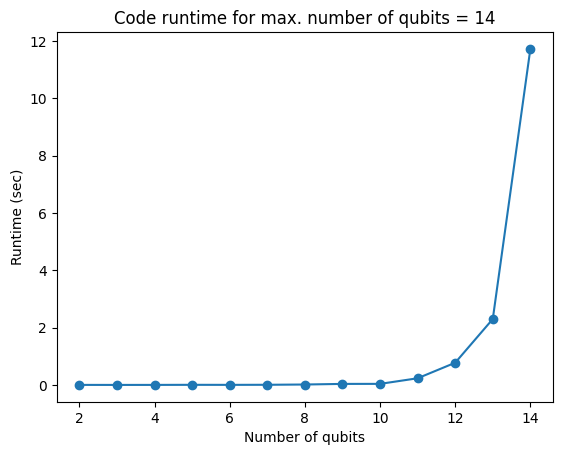

In [20]:
x1 = list(range(2,n_qubits_max+1))
plt.plot(x1,runtime_lst1[2:],'-o')
plt.xlabel("Number of qubits")
plt.ylabel("Runtime (sec)")
plt.title("Code runtime for max. number of qubits = %i" %n_qubits_max)

## Implementation of part 2

In [8]:
def q_ckt2(n_qubits):

    init_state = np.reshape(zero*n_qubits,(n_qubits,2)) #Start with all zeros
    inter_state = np.tensordot(np.tensordot(init_state,X,axes=1),H,axes=1)

    inter_state_new = np.zeros((int(n_qubits/2),4))
    for i in range(int(n_qubits/2)):
        inter_state_new[i] = np.kron(inter_state[2*i],inter_state[2*i+1])
        
    final_state = np.tensordot(inter_state_new,CNOT,axes=1) 
    final_state_n = final_state[0] 
    for i in range(1,int(n_qubits/2)):
        final_state_n = np.kron(final_state_n,final_state[i]) 
    if n_qubits%2==1:
        final_state_n = np.kron(final_state_n,inter_state[n_qubits-1])

In [11]:
runtime_lst2 = runtime(n_qubits_max,q_ckt2)

Text(0.5, 1.0, 'Code runtime for max. number of qubits = 31')

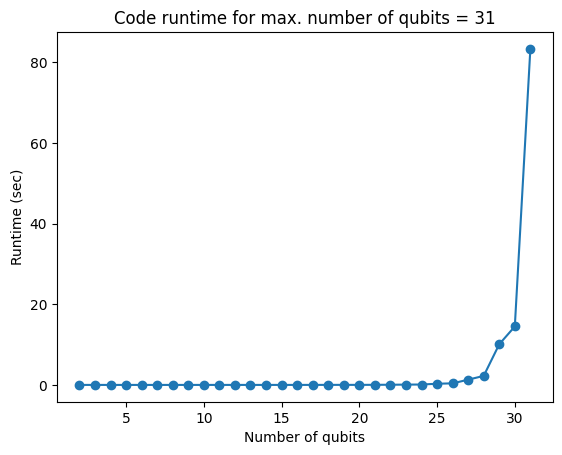

In [17]:
x2 = list(range(2,n_qubits_max+1))
plt.plot(x2,runtime_lst2[2:],'-o')
plt.xlabel("Number of qubits")
plt.ylabel("Runtime (sec)")
plt.title("Code runtime for max. number of qubits = %i" %n_qubits_max)

## Comparison

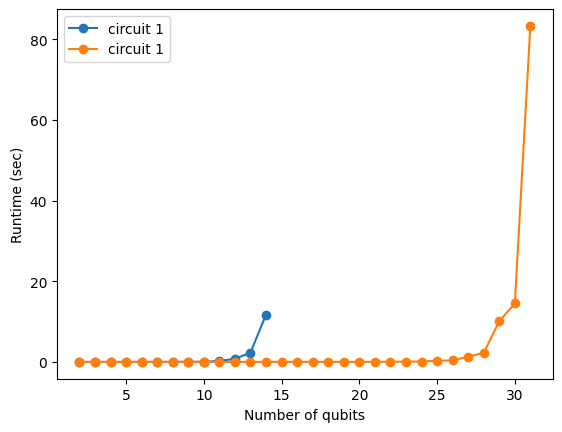

In [25]:
plt.plot(x1,runtime_lst1[2:],'-o',label='circuit 1')
plt.plot(x2,runtime_lst2[2:],'-o',label='circuit 1')
plt.legend()
plt.xlabel("Number of qubits")
plt.ylabel("Runtime (sec)")
plt.show()